In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

import  warnings
warnings.simplefilter('ignore')

%matplotlib inline

**Zoom daily stock price from 01/23/2020 to 09/17/2021, downloaded from Yahoo Finance**

**Covid-19 daily cases from 01/23/2020 (first available date) to 09/17/2021, downloaded from US-CDC covid data tracker**

**We will check the relation between daily new cases and Zoom stock prices.**

**Possible hypothesis 0: There is no significant correlation between Zoom daily stock prices and daily new Covid-19 cases from 01/23/2020 to 09/17/2021; alternative hypothesis 1: There is significant correlation between Zoom daily stock prices and daily new Covid-19 cases from 01/23/2020 to 09/17/2021**

In [2]:
zm = pd.read_csv('data/ZM.csv')
covid = pd.read_csv('data/data_table_for_daily_case_trends__the_united_states.csv')

In [3]:
zm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       417 non-null    object 
 1   Open       417 non-null    float64
 2   High       417 non-null    float64
 3   Low        417 non-null    float64
 4   Close      417 non-null    float64
 5   Adj Close  417 non-null    float64
 6   Volume     417 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 22.9+ KB


In [4]:
zm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-23,75.669998,75.970001,74.209999,74.470001,74.470001,1279000
1,2020-01-24,74.970001,76.184998,72.375000,73.000000,73.000000,1660200
2,2020-01-27,71.330002,72.132004,70.320000,70.440002,70.440002,1750700
3,2020-01-28,71.000000,72.480003,70.260002,71.510002,71.510002,1598200
4,2020-01-29,72.510002,74.139999,71.212997,73.580002,73.580002,1373400


In [5]:
zm.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
412,2021-09-10,296.910004,306.263000,296.809998,301.500000,301.500000,6089600
413,2021-09-13,300.160004,300.274994,289.820007,290.239990,290.239990,4916100
414,2021-09-14,290.338013,291.880005,280.920013,281.440002,281.440002,6036800
415,2021-09-15,282.329987,283.070007,277.019989,279.119995,279.119995,4647400
416,2021-09-16,277.679993,279.290009,273.500000,278.220001,278.220001,4676300


In [6]:
zm.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             604 non-null    object
 1   Date              604 non-null    object
 2   New Cases         604 non-null    int64 
 3   7-Day Moving Avg  604 non-null    int64 
 4   Historic Cases    604 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 23.7+ KB


In [8]:
covid.head()

,State,Date,New Cases,7-Day Moving Avg,Historic Cases
0,United States,Sep 17 2021,151488,140234,1030
1,United States,Sep 16 2021,159675,142888,1313
2,United States,Sep 15 2021,162408,147154,1604
3,United States,Sep 14 2021,154535,149678,1430
4,United States,Sep 13 2021,111822,143054,164


In [9]:
covid.tail()

,State,Date,New Cases,7-Day Moving Avg,Historic Cases
599,United States,Jan 27 2020,0,1,0
600,United States,Jan 26 2020,3,1,0
601,United States,Jan 25 2020,0,1,0
602,United States,Jan 24 2020,1,1,0
603,United States,Jan 23 2020,1,1,0


In [10]:
covid.isnull().sum()

State               0
Date                0
New Cases           0
7-Day Moving Avg    0
Historic Cases      0
dtype: int64

In [11]:
# change the datetime strings to datetime
zm.Date = pd.to_datetime(zm.Date)
covid.Date = pd.to_datetime(covid.Date)

In [12]:
zm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       417 non-null    datetime64[ns]
 1   Open       417 non-null    float64       
 2   High       417 non-null    float64       
 3   Low        417 non-null    float64       
 4   Close      417 non-null    float64       
 5   Adj Close  417 non-null    float64       
 6   Volume     417 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.9 KB


In [13]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   State             604 non-null    object        
 1   Date              604 non-null    datetime64[ns]
 2   New Cases         604 non-null    int64         
 3   7-Day Moving Avg  604 non-null    int64         
 4   Historic Cases    604 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 23.7+ KB


In [14]:
zm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-23,75.669998,75.970001,74.209999,74.470001,74.470001,1279000
1,2020-01-24,74.970001,76.184998,72.375000,73.000000,73.000000,1660200
2,2020-01-27,71.330002,72.132004,70.320000,70.440002,70.440002,1750700
3,2020-01-28,71.000000,72.480003,70.260002,71.510002,71.510002,1598200
4,2020-01-29,72.510002,74.139999,71.212997,73.580002,73.580002,1373400


In [15]:
covid.head()

,State,Date,New Cases,7-Day Moving Avg,Historic Cases
0,United States,2021-09-17,151488,140234,1030
1,United States,2021-09-16,159675,142888,1313
2,United States,2021-09-15,162408,147154,1604
3,United States,2021-09-14,154535,149678,1430
4,United States,2021-09-13,111822,143054,164


**Zoom stock data is sorted from early to latest, while covid data is the opposite.**

**Zoom stock data skipped all non-trading dates, such as Saterday, Sunday, and federal holidays, while covid data is completely day to day.**

**So, we will join the Zoom data to covid data and fill in the missing dates with the data of the previous days (ffill)**

In [16]:
df = covid.merge(zm, how='left', on='Date')

In [17]:
df

,State,Date,New Cases,7-Day Moving Avg,Historic Cases,Open,High,Low,Close,Adj Close,Volume
0,United States,2021-09-17,151488,140234,1030,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2021-09-16,159675,142888,1313,277.679993,279.290009,273.500000,278.220001,278.220001,4676300.0
2,United States,2021-09-15,162408,147154,1604,282.329987,283.070007,277.019989,279.119995,279.119995,4647400.0
3,United States,2021-09-14,154535,149678,1430,290.338013,291.880005,280.920013,281.440002,281.440002,6036800.0
4,United States,2021-09-13,111822,143054,164,300.160004,300.274994,289.820007,290.239990,290.239990,4916100.0
...,...,...,...,...,...,...,...,...,...,...,...
599,United States,2020-01-27,0,1,0,71.330002,72.132004,70.320000,70.440002,70.440002,1750700.0
600,United States,2020-01-26,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN
601,United States,2020-01-25,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
602,United States,2020-01-24,1,1,0,74.970001,76.184998,72.375000,73.000000,73.000000,1660200.0


In [18]:
# set datetime as index
df.set_index('Date', inplace=True)

In [19]:
# sort datetime index from early to latest
df = df.sort_index()

In [20]:
df.head()

,State,New Cases,7-Day Moving Avg,Historic Cases,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,
2020-01-23,United States,1,1,0,75.669998,75.970001,74.209999,74.470001,74.470001,1279000.0
2020-01-24,United States,1,1,0,74.970001,76.184998,72.375000,73.000000,73.000000,1660200.0
2020-01-25,United States,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,United States,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,United States,0,1,0,71.330002,72.132004,70.320000,70.440002,70.440002,1750700.0


In [21]:
# keep only daily new cases and daily open price
df = df[['New Cases', 'Open']].rename(columns={'New Cases':'daily_case', 'Open':'daily_price'})

In [22]:
# fill in NaN with forward value
df = df.fillna(method='ffill')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2020-01-23 to 2021-09-17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   daily_case   604 non-null    int64  
 1   daily_price  604 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 14.2 KB


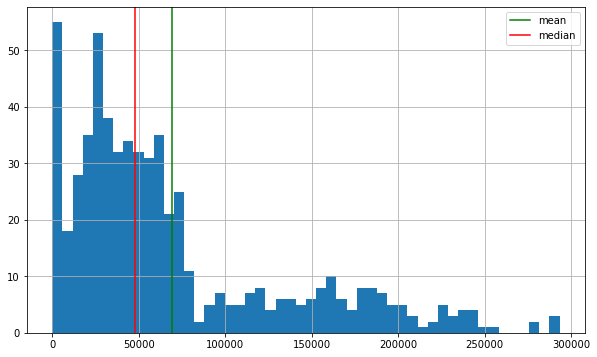

In [24]:
# hist for daily new cases
fig = plt.figure(figsize=(10,6))
df.daily_case.hist(bins=50)
plt.axvline(df.daily_case.mean(), color='green', label='mean')
plt.axvline(df.daily_case.median(), color='red', label='median')
plt.legend()

Text(0, 0.5, 'Daily Zoom Price')

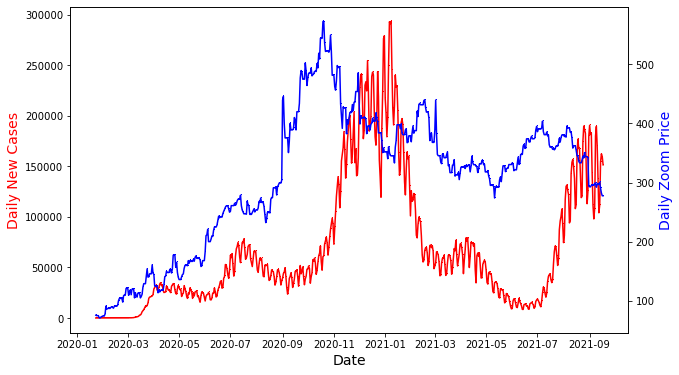

In [25]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,6))
# make a plot
ax.plot(df.daily_case, color="red", marker=",")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Daily New Cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(df.daily_price,color="blue",marker=",")
ax2.set_ylabel("Daily Zoom Price",color="blue",fontsize=14)

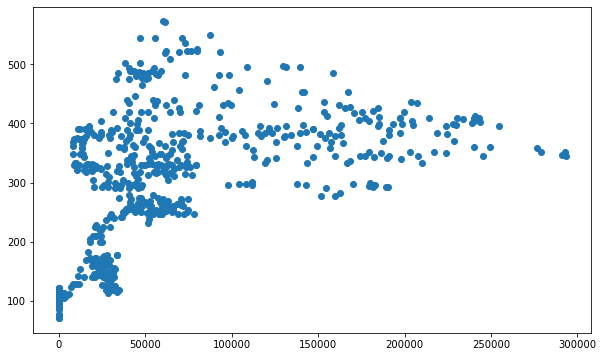

In [26]:
# scatter plot
fig = plt.figure(figsize=(10,6))
plt.scatter(df.daily_case, df.daily_price)

In [27]:
# plot correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,daily_case,daily_price
daily_case,1.00,0.49
daily_price,0.49,1.00


<AxesSubplot:>

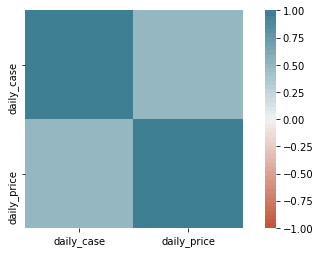

In [28]:
# heatmap
fig = plt.figure(figsize=(8,4))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=50), square=True)

In [29]:
import statsmodels.api as sm

In [30]:
X = df.daily_case
y = df.daily_price

In [31]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            daily_price   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              1095.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):                   1.03e-137
Time:                        15:51:15   Log-Likelihood:                         -4042.0
No. Observations:                 604   AIC:                                      8086.
Df Residuals:                     603   BIC:                                      8090.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

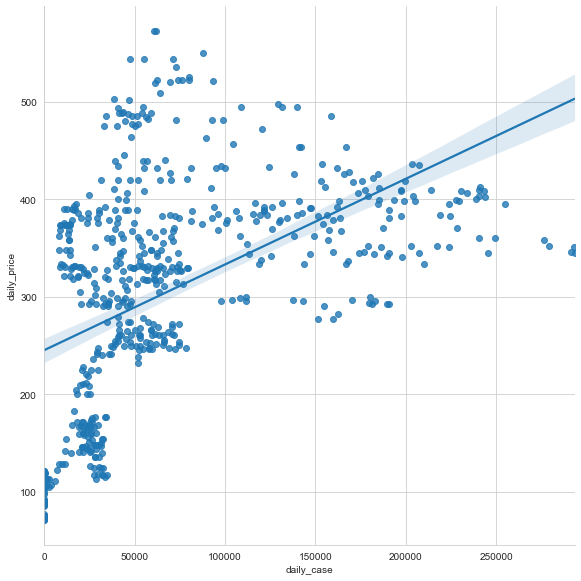

In [32]:
#scatter plot with 
sns.set_style('whitegrid')
sns.lmplot(x ='daily_case', y ='daily_price', data = df, size=8)

### Summary

**In general, Zoom stock prices and daily new cases had very similar run charts during the given period. The reason may be that when daily new cases goes high, the situation goes worse, so more people would use the Zoom meeting tools to work or study remotely hence boosting the Zoom stock.**

**Interestingly, the increases and decreases of Zoom stock came earlier than that of daily new cases, about 2 months ahead. Specifically, for the first 8 months from Jan. 2020 to Aug. 2020, they moved almost together. Then, ever since Sep. 2020, Zoom stock prices started to go up and down 2 to 3 months before daily new cases does, in the same direction and same shape.**